# **Import Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Load and Describe Data**

## **Load Data**

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# load dataset
df = pd.read_csv('flight.csv')

#change columns to lowercase
df.columns = df.columns.str.lower()

# show 5 sample data
df.sample(5)

member_no    ffp_date first_flight_date gender  ffp_tier work_city  \
21122      17471   10/8/2011         2/19/2012   Male         4  kelamayi   
54970      50014   2/14/2011         2/14/2011   Male         4  dongying   
59454       6152    2/2/2012         7/13/2012   Male         4    foshan   
17945      49360  10/12/2009         1/10/2013   Male         4  hangzhou   
28884      13951  12/28/2012        12/28/2012   Male         4   beijing   

      work_province work_country   age  load_time  ...  sum_yr_2  seg_km_sum  \
21122      xinjiang           CN  43.0  3/31/2014  ...    9445.0       17521   
54970      shandong           CN  36.0  3/31/2014  ...    1061.0        2963   
59454     guangdong           CN  38.0  3/31/2014  ...       0.0        2254   
17945      zhejiang           CN  32.0  3/31/2014  ...    9293.0       19707   
28884             .           CN  27.0  3/31/2014  ...    5751.0       11624   

       last_flight_date  last_to_end  avg_interval max_interval  \
21122         3/22/2014           10     65.800000          182   
54970         10/3/2013          181    242.000000          480   
59454          9/6/2012          573     55.000000           55   
17945         3/31/2014            1     31.857143           94   
28884          2/3/2014           58     67.000000          156   

       exchange_count  avg_discount  points_sum  point_notflight  
21122               0      0.660382       11699                0  
54970               0      0.678063        1651                0  
59454               0      0.600000         844                0  
17945               0      0.692155       12127                0  
28884               0      0.678248        6075                0  

[5 rows x 23 columns]

## **Checking Columns and Missing Values With df.info()**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62988 non-null  int64  
 1   ffp_date           62988 non-null  object 
 2   first_flight_date  62988 non-null  object 
 3   gender             62985 non-null  object 
 4   ffp_tier           62988 non-null  int64  
 5   work_city          60719 non-null  object 
 6   work_province      59740 non-null  object 
 7   work_country       62962 non-null  object 
 8   age                62568 non-null  float64
 9   load_time          62988 non-null  object 
 10  flight_count       62988 non-null  int64  
 11  bp_sum             62988 non-null  int64  
 12  sum_yr_1           62437 non-null  float64
 13  sum_yr_2           62850 non-null  float64
 14  seg_km_sum         62988 non-null  int64  
 15  last_flight_date   62988 non-null  object 
 16  last_to_end        629

Dari informasi diatas:
- Dataset ini memiliki 62,988 baris dan 23 kolom.
- Untuk kolom `ffp_date, first_flight_date, load_time, last_flight_date` karena data berupa tanggal maka seharusnya memiliki tipe data datetime
- Untuk kolom `age` akan lebih ideal menggunakan tipe int64

## **Statistical summary**

In [5]:
#Statistical summary numerical
df.describe()

member_no      ffp_tier           age  flight_count         bp_sum  \
count  62988.000000  62988.000000  62568.000000  62988.000000   62988.000000   
mean   31494.500000      4.102162     42.476346     11.839414   10925.081254   
std    18183.213715      0.373856      9.885915     14.049471   16339.486151   
min        1.000000      4.000000      6.000000      2.000000       0.000000   
25%    15747.750000      4.000000     35.000000      3.000000    2518.000000   
50%    31494.500000      4.000000     41.000000      7.000000    5700.000000   
75%    47241.250000      4.000000     48.000000     15.000000   12831.000000   
max    62988.000000      6.000000    110.000000    213.000000  505308.000000   

            sum_yr_1       sum_yr_2     seg_km_sum   last_to_end  \
count   62437.000000   62850.000000   62988.000000  62988.000000   
mean     5355.376064    5604.026014   17123.878691    176.120102   
std      8109.450147    8703.364247   20960.844623    183.822223   
min         0.000000       0.000000     368.000000      1.000000   
25%      1003.000000     780.000000    4747.000000     29.000000   
50%      2800.000000    2773.000000    9994.000000    108.000000   
75%      6574.000000    6845.750000   21271.250000    268.000000   
max    239560.000000  234188.000000  580717.000000    731.000000   

       avg_interval  max_interval  exchange_count  avg_discount   points_sum  \
count  62988.000000  62988.000000    62988.000000  62988.000000   62988.0000   
mean      67.749788    166.033895        0.319775      0.721558   12545.7771   
std       77.517866    123.397180        1.136004      0.185427   20507.8167   
min        0.000000      0.000000        0.000000      0.000000       0.0000   
25%       23.370370     79.000000        0.000000      0.611997    2775.0000   
50%       44.666667    143.000000        0.000000      0.711856    6328.5000   
75%       82.000000    228.000000        0.000000      0.809476   14302.5000   
max      728.000000    728.000000       46.000000      1.500000  985572.0000   

       point_notflight  
count     62988.000000  
mean          2.728155  
std           7.364164  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max         140.000000

Dari informasi diatas:
- Dataset ini memiliki 15 kolom numerical
- Kolom `member_no, fpp_tier, age, avg_discount` terlihat memiliki distribusi normal
- Sementara kolom lainnya tampak memiliki distribusi skewed (mean > median)
- Dalam kolom `age` ada customer yang berusia 110 tahun, dan tampak abnormal sehingga dapat dihapus di proses selanjutnya

In [6]:
#Statistical summary categorical
df.describe(include='object')

ffp_date first_flight_date gender  work_city work_province  \
count       62988             62988  62985      60719         59740   
unique       3068              3406      2       3234          1165   
top     1/13/2011         2/16/2013   Male  guangzhou     guangdong   
freq          184                96  48134       9386         17509   

       work_country  load_time last_flight_date  
count         62962      62988            62988  
unique          118          1              731  
top              CN  3/31/2014        3/31/2014  
freq          57748      62988              959

Dari informasi diatas:
- Dataset ini memiliki 8 kolom categorical
- Tampak kebanyakan kolom memiliki nilai unique yang tinggi kecuali gender & load_time

# **Data Pre-Processing**

## **Initialize df_clean**

In [7]:
df_clean = df.copy()

## **Check Null and Missing Values**

In [8]:
#Checking Missing Values
df_clean.isnull().sum().sort_values(ascending=False)

work_province        3248
work_city            2269
sum_yr_1              551
age                   420
sum_yr_2              138
work_country           26
gender                  3
member_no               0
last_flight_date        0
points_sum              0
avg_discount            0
exchange_count          0
max_interval            0
avg_interval            0
last_to_end             0
bp_sum                  0
seg_km_sum              0
ffp_date                0
flight_count            0
load_time               0
ffp_tier                0
first_flight_date       0
point_notflight         0
dtype: int64

In [9]:
missing_value = df_clean.isnull().sum().reset_index()
missing_value.columns = ['feature','missing_value']
missing_value['percentage'] = round((missing_value['missing_value']/len(df_clean))*100,3)
missing_value = missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
missing_value = missing_value[missing_value['percentage']>0]
missing_value

feature  missing_value  percentage
0  work_province           3248       5.157
1      work_city           2269       3.602
2       sum_yr_1            551       0.875
3            age            420       0.667
4       sum_yr_2            138       0.219
5   work_country             26       0.041
6         gender              3       0.005

Dari informasi diatas:
- Dari dataset ini kolom `work_province, work_city, sum_yr_1, age, sum_yr_2, work_country, gender`memiliki missing value
- Untuk kolom `sum_yr_1, age, sum_yr_2, work_country, gender` karena memiliki persentasi dibawah 1% maka akan di hapus
- Untuk kolom `work_province, work_city` walaupun memiliki persentase dibawah 6% karena memiliki jumlah yang besar maka akan di imputasi mengginakan nilai modus

### **Handle Missing Value**

In [10]:
# Drop rows sum_yr_1, age, sum_yr_2, work_country, gender
colums = ['sum_yr_1', 'age', 'sum_yr_2', 'work_country', 'gender']
for col in colums:
  df_clean.dropna(subset=[col], inplace=True)

In [11]:
# Replace missing row with mode
df_clean['work_province'].fillna(df_clean['work_province'].mode()[0], inplace=True)
df_clean['work_city'].fillna(df_clean['work_city'].mode()[0], inplace=True)

In [12]:
df_clean.isna().sum()

member_no            0
ffp_date             0
first_flight_date    0
gender               0
ffp_tier             0
work_city            0
work_province        0
work_country         0
age                  0
load_time            0
flight_count         0
bp_sum               0
sum_yr_1             0
sum_yr_2             0
seg_km_sum           0
last_flight_date     0
last_to_end          0
avg_interval         0
max_interval         0
exchange_count       0
avg_discount         0
points_sum           0
point_notflight      0
dtype: int64

### **Incorrect Value**

Kita menemukan error saat proses Adjust data type sehingga akan dilakukan pengecekan incorrect value </br>"ParserError: day is out of range for month: 2014/2/29  0:00:00"

In [13]:
#Check column last_flight_date with incorect value
df_clean[df_clean.last_flight_date.str.contains('2014/2/29')]

member_no    ffp_date first_flight_date  gender  ffp_tier  \
248        56497   6/17/2007         6/17/2007  Female         6   
447        17306   8/26/2009         4/29/2010    Male         5   
473          915  11/10/2006         1/26/2007    Male         5   
832        20336   7/13/2005          8/6/2005    Male         5   
1051       62884   5/24/2006         4/21/2007    Male         5   
...          ...         ...               ...     ...       ...   
61539      55995   1/11/2013         7/10/2013    Male         4   
61871      48742   7/26/2009         7/26/2009    Male         4   
61909       9190   4/11/2011         4/20/2011    Male         4   
62721      38776  10/31/2007         3/13/2008    Male         4   
62929      46449    2/7/2010         7/31/2010    Male         4   

          work_city work_province work_country   age  load_time  ...  \
248       guangzhou     guangdong           CN  46.0  3/31/2014  ...   
447         haerbin  heilongjiang           CN  70.0  3/31/2014  ...   
473               .       beijing           CN  39.0  3/31/2014  ...   
832       guangzhou     guangdong           CN  40.0  3/31/2014  ...   
1051          wuhan         hubei           CN  50.0  3/31/2014  ...   
...             ...           ...          ...   ...        ...  ...   
61539     dalianshi      liaoning           CN  23.0  3/31/2014  ...   
61871       tianjin       tianjin           CN  37.0  3/31/2014  ...   
61909     guangzhou     guangdong           CN  34.0  3/31/2014  ...   
62721        foshan     guangdong           CN  42.0  3/31/2014  ...   
62929  guangzhoushi     guangdong           CN  24.0  3/31/2014  ...   

       sum_yr_2  seg_km_sum    last_flight_date  last_to_end  avg_interval  \
248     70845.0       85000  2014/2/29  0:00:00           32     13.250000   
447     46323.0       69453  2014/2/29  0:00:00           32     22.766667   
473     30580.0       65717  2014/2/29  0:00:00           32     14.250000   
832     36417.0      114222  2014/2/29  0:00:00           32      8.696203   
1051    35680.0       49859  2014/2/29  0:00:00           32     19.115385   
...         ...         ...                 ...          ...           ...   
61539     955.0        3513  2014/2/29  0:00:00           32    117.000000   
61871     966.0        1298  2014/2/29  0:00:00           32    135.000000   
61909     853.0        2595  2014/2/29  0:00:00           32      1.000000   
62721     688.0        1199  2014/2/29  0:00:00           32     78.000000   
62929     401.0        1312  2014/2/29  0:00:00           32     43.000000   

      max_interval  exchange_count  avg_discount  points_sum  point_notflight  
248             57               0      1.373478      132653                4  
447             75               6      1.375395      101413                7  
473             65               1      1.425974       93153                8  
832             34               2      0.664970       91476               15  
1051            72               4      1.388584       69047                4  
...            ...             ...           ...         ...              ...  
61539          211               0      0.276667           0                0  
61871          135               0      0.690000        1094                1  
61909            1               0      0.340000        3356               19  
62721           78               0      0.489525         276                0  
62929           43               0      0.275000        1211                3  

[419 rows x 23 columns]

In [14]:
df_clean[df_clean.last_flight_date.str.contains('2014/2/29')]['last_flight_date'].count()

419

In [15]:
print('Incorrect `last_flight_date` percentage: ', end='')
print(str(round(df_clean[df_clean.last_flight_date.str.contains('2014/2/29')]['last_flight_date'].count()/len(df_clean), 3)), '%')

Incorrect `last_flight_date` percentage: 0.007 %


Karena persentase incorrect value kolom last_flight_date hanya 0.007%, maka baris ini akan di hapus

In [16]:
# Drop rows last_flight_date with incorrect value
df_clean.drop(df_clean[df_clean.last_flight_date.str.contains('2014/2/29')].index, inplace = True)

In [17]:
df_clean[df_clean.last_flight_date.str.contains('2014/2/29')]['last_flight_date'].count()

0

## **Duplicate Values**

In [18]:
df_clean.duplicated().sum()

0

Tidak ditemukan adanya duplicated value dalam dataset ini

## **Adjust Data Type**

In [19]:
# Ubah data type kolom `age` dari float ke int64
df_clean['age'] = df_clean['age'].astype(int) 

In [20]:
# Change the data type in the ffp_date, dirst_fligt_date, load_time, last_flight_date columns from object to datetime
date_col = ['ffp_date', 'first_flight_date', 'load_time','last_flight_date']
for col in date_col:
  df_clean[col] = pd.to_datetime(df_clean[col])

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61437 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   member_no          61437 non-null  int64         
 1   ffp_date           61437 non-null  datetime64[ns]
 2   first_flight_date  61437 non-null  datetime64[ns]
 3   gender             61437 non-null  object        
 4   ffp_tier           61437 non-null  int64         
 5   work_city          61437 non-null  object        
 6   work_province      61437 non-null  object        
 7   work_country       61437 non-null  object        
 8   age                61437 non-null  int64         
 9   load_time          61437 non-null  datetime64[ns]
 10  flight_count       61437 non-null  int64         
 11  bp_sum             61437 non-null  int64         
 12  sum_yr_1           61437 non-null  float64       
 13  sum_yr_2           61437 non-null  float64       
 14  seg_km

## **Redefine Numeric and Categorical**

In [22]:
#Numeric
numerical = df_clean.loc[:, (df_clean.dtypes == int) | (df_clean.dtypes == float)].columns.tolist()
numerical

['member_no',
 'ffp_tier',
 'age',
 'flight_count',
 'bp_sum',
 'sum_yr_1',
 'sum_yr_2',
 'seg_km_sum',
 'last_to_end',
 'avg_interval',
 'max_interval',
 'exchange_count',
 'avg_discount',
 'points_sum',
 'point_notflight']

In [23]:
#Categorical
categorical = df_clean.loc[:, (df_clean.dtypes != int) & (df_clean.dtypes != float)].columns.tolist()
categorical

['ffp_date',
 'first_flight_date',
 'gender',
 'work_city',
 'work_province',
 'work_country',
 'load_time',
 'last_flight_date']

# **Exploratory Data Analysis**

## **Univariate Analysis**

### **Box Plot**

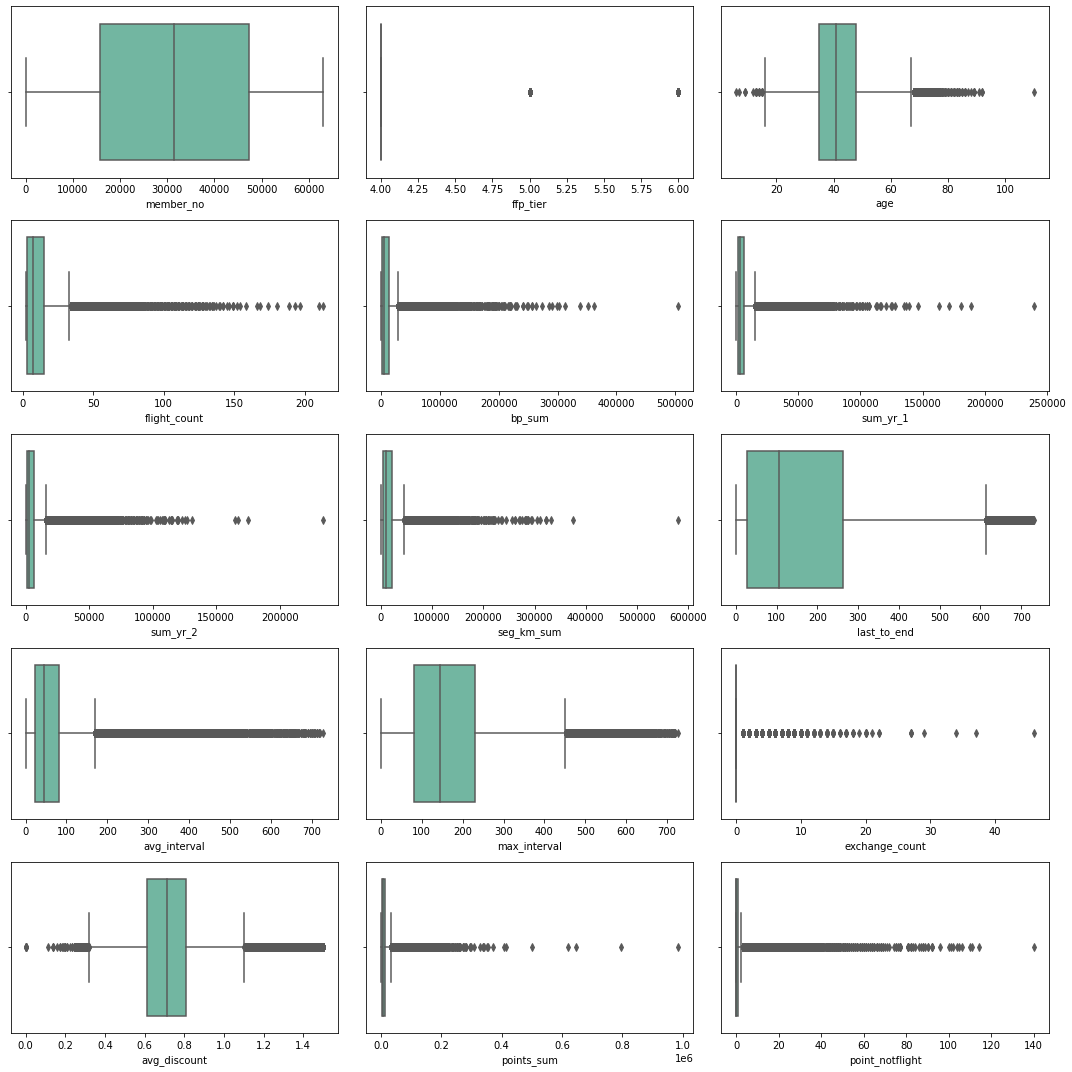

In [24]:
# boxplot visualization for numerical data

plt.figure(figsize=(15, 15))
for i in range(0, len(numerical)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df_clean[numerical[i]], palette="Set2")
    plt.tight_layout()

plt.show()

Dari Boxplot dapat terlihat jika hampir seluruh feature memiliki outlier kecuali `member_no` & `ffp_tier`

### **Distribution Plot**

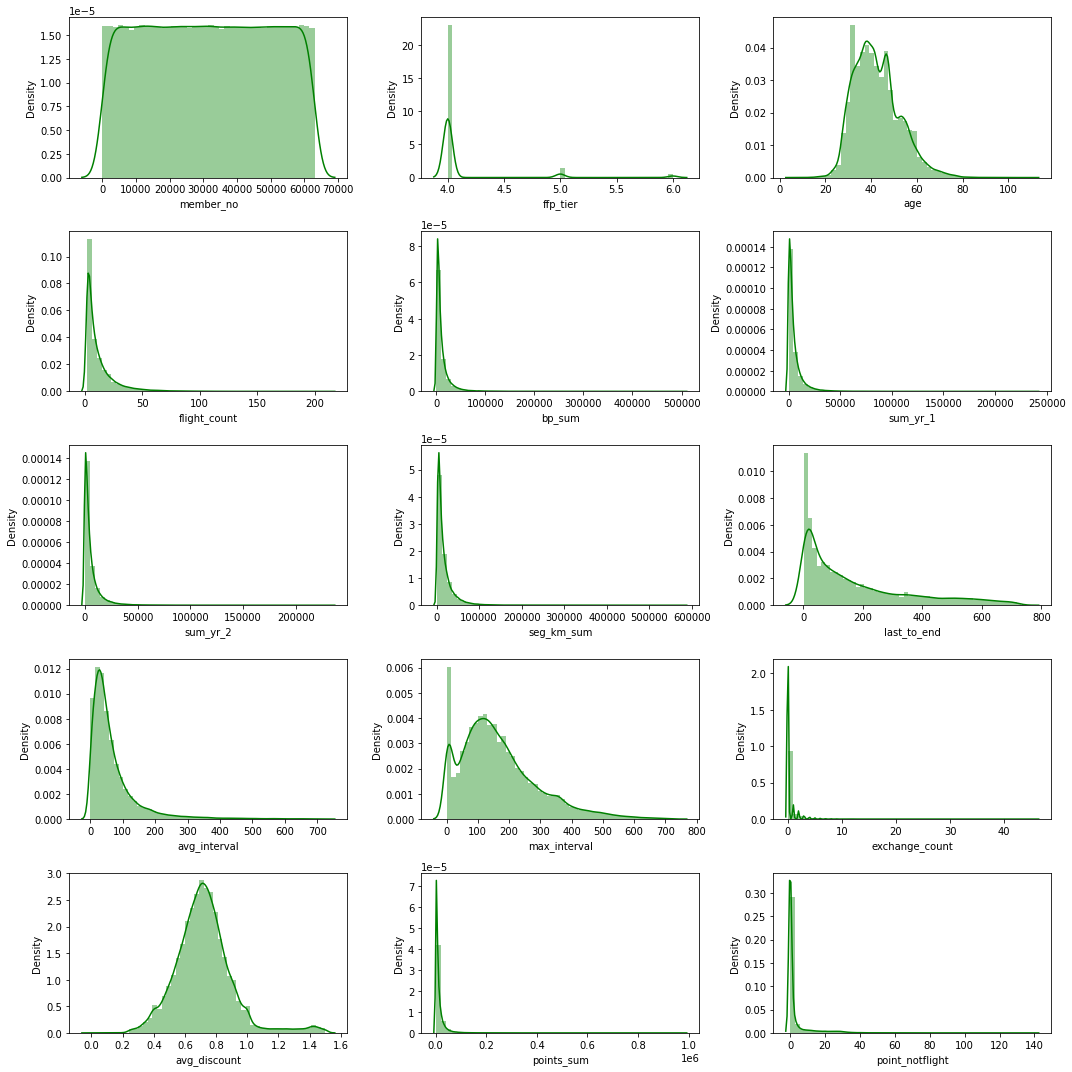

In [25]:
# distribution plot for numerical data

plt.figure(figsize=(15, 15))
for i in range(0, len(numerical)):
    plt.subplot(5, 3,i+1)
    sns.distplot(df_clean[numerical[i]], color='green')
    plt.tight_layout()

Dari Distribution Plot dapat terlihat jika hampir seluruh feature memiliki distribusi positif skewed kecuali `member_no` & `avg_discount`

### **Count Plot**

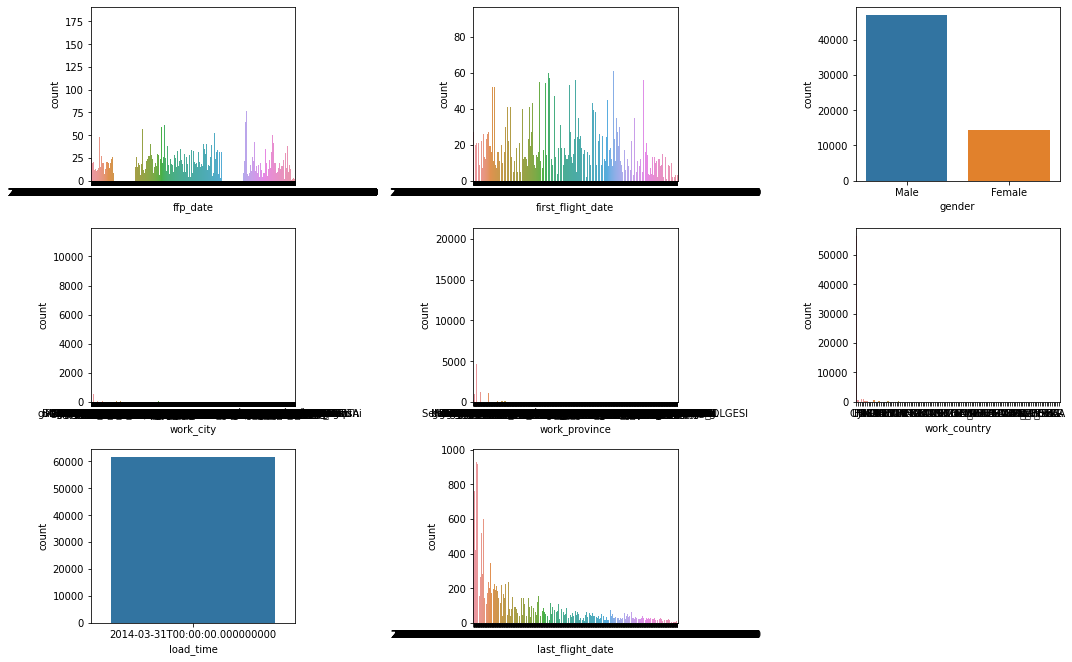

In [26]:
# Count plot for categorical data

plt.figure(figsize=(15, 15))
for i in range(0, len(categorical)):
    plt.subplot(5, 3, i+1)
    sns.countplot(df_clean[categorical[i]])
    plt.tight_layout()

Dari Count Plot diatas:
- Kebanyakan customer adalah Laki-laki
- Tampak kebanyakan feature memiliki nilai unique yang besar
- Untuk load_time hanya memiliki 1 value 2014-03-31 yang dimana merupakan tangal data diambil

## **Multivariate Analysis**

### **Correlaction/Associations Heat Map**

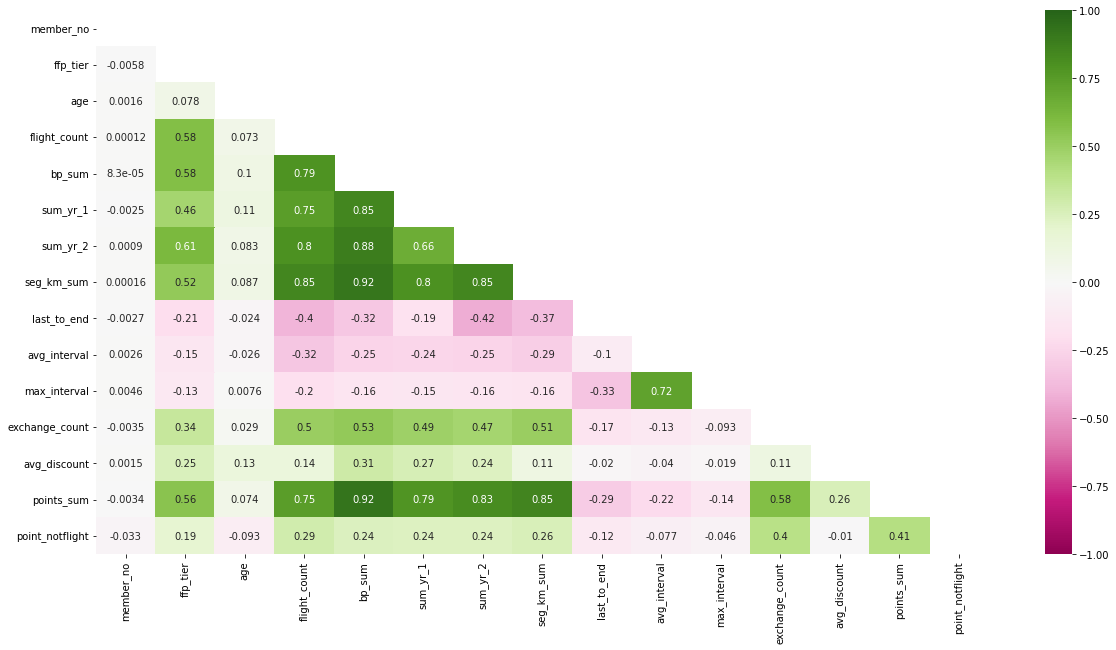

In [27]:
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(df_clean.corr(), dtype=np.bool))
sns.heatmap(df_clean.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PiYG')

Dari Heatmap korelasi dapat terlihat jika banyak feture yang memiliki korelasi positif yang kuat > 0.7:

### **Pair Plot**

<Figure size 1080x1080 with 0 Axes>

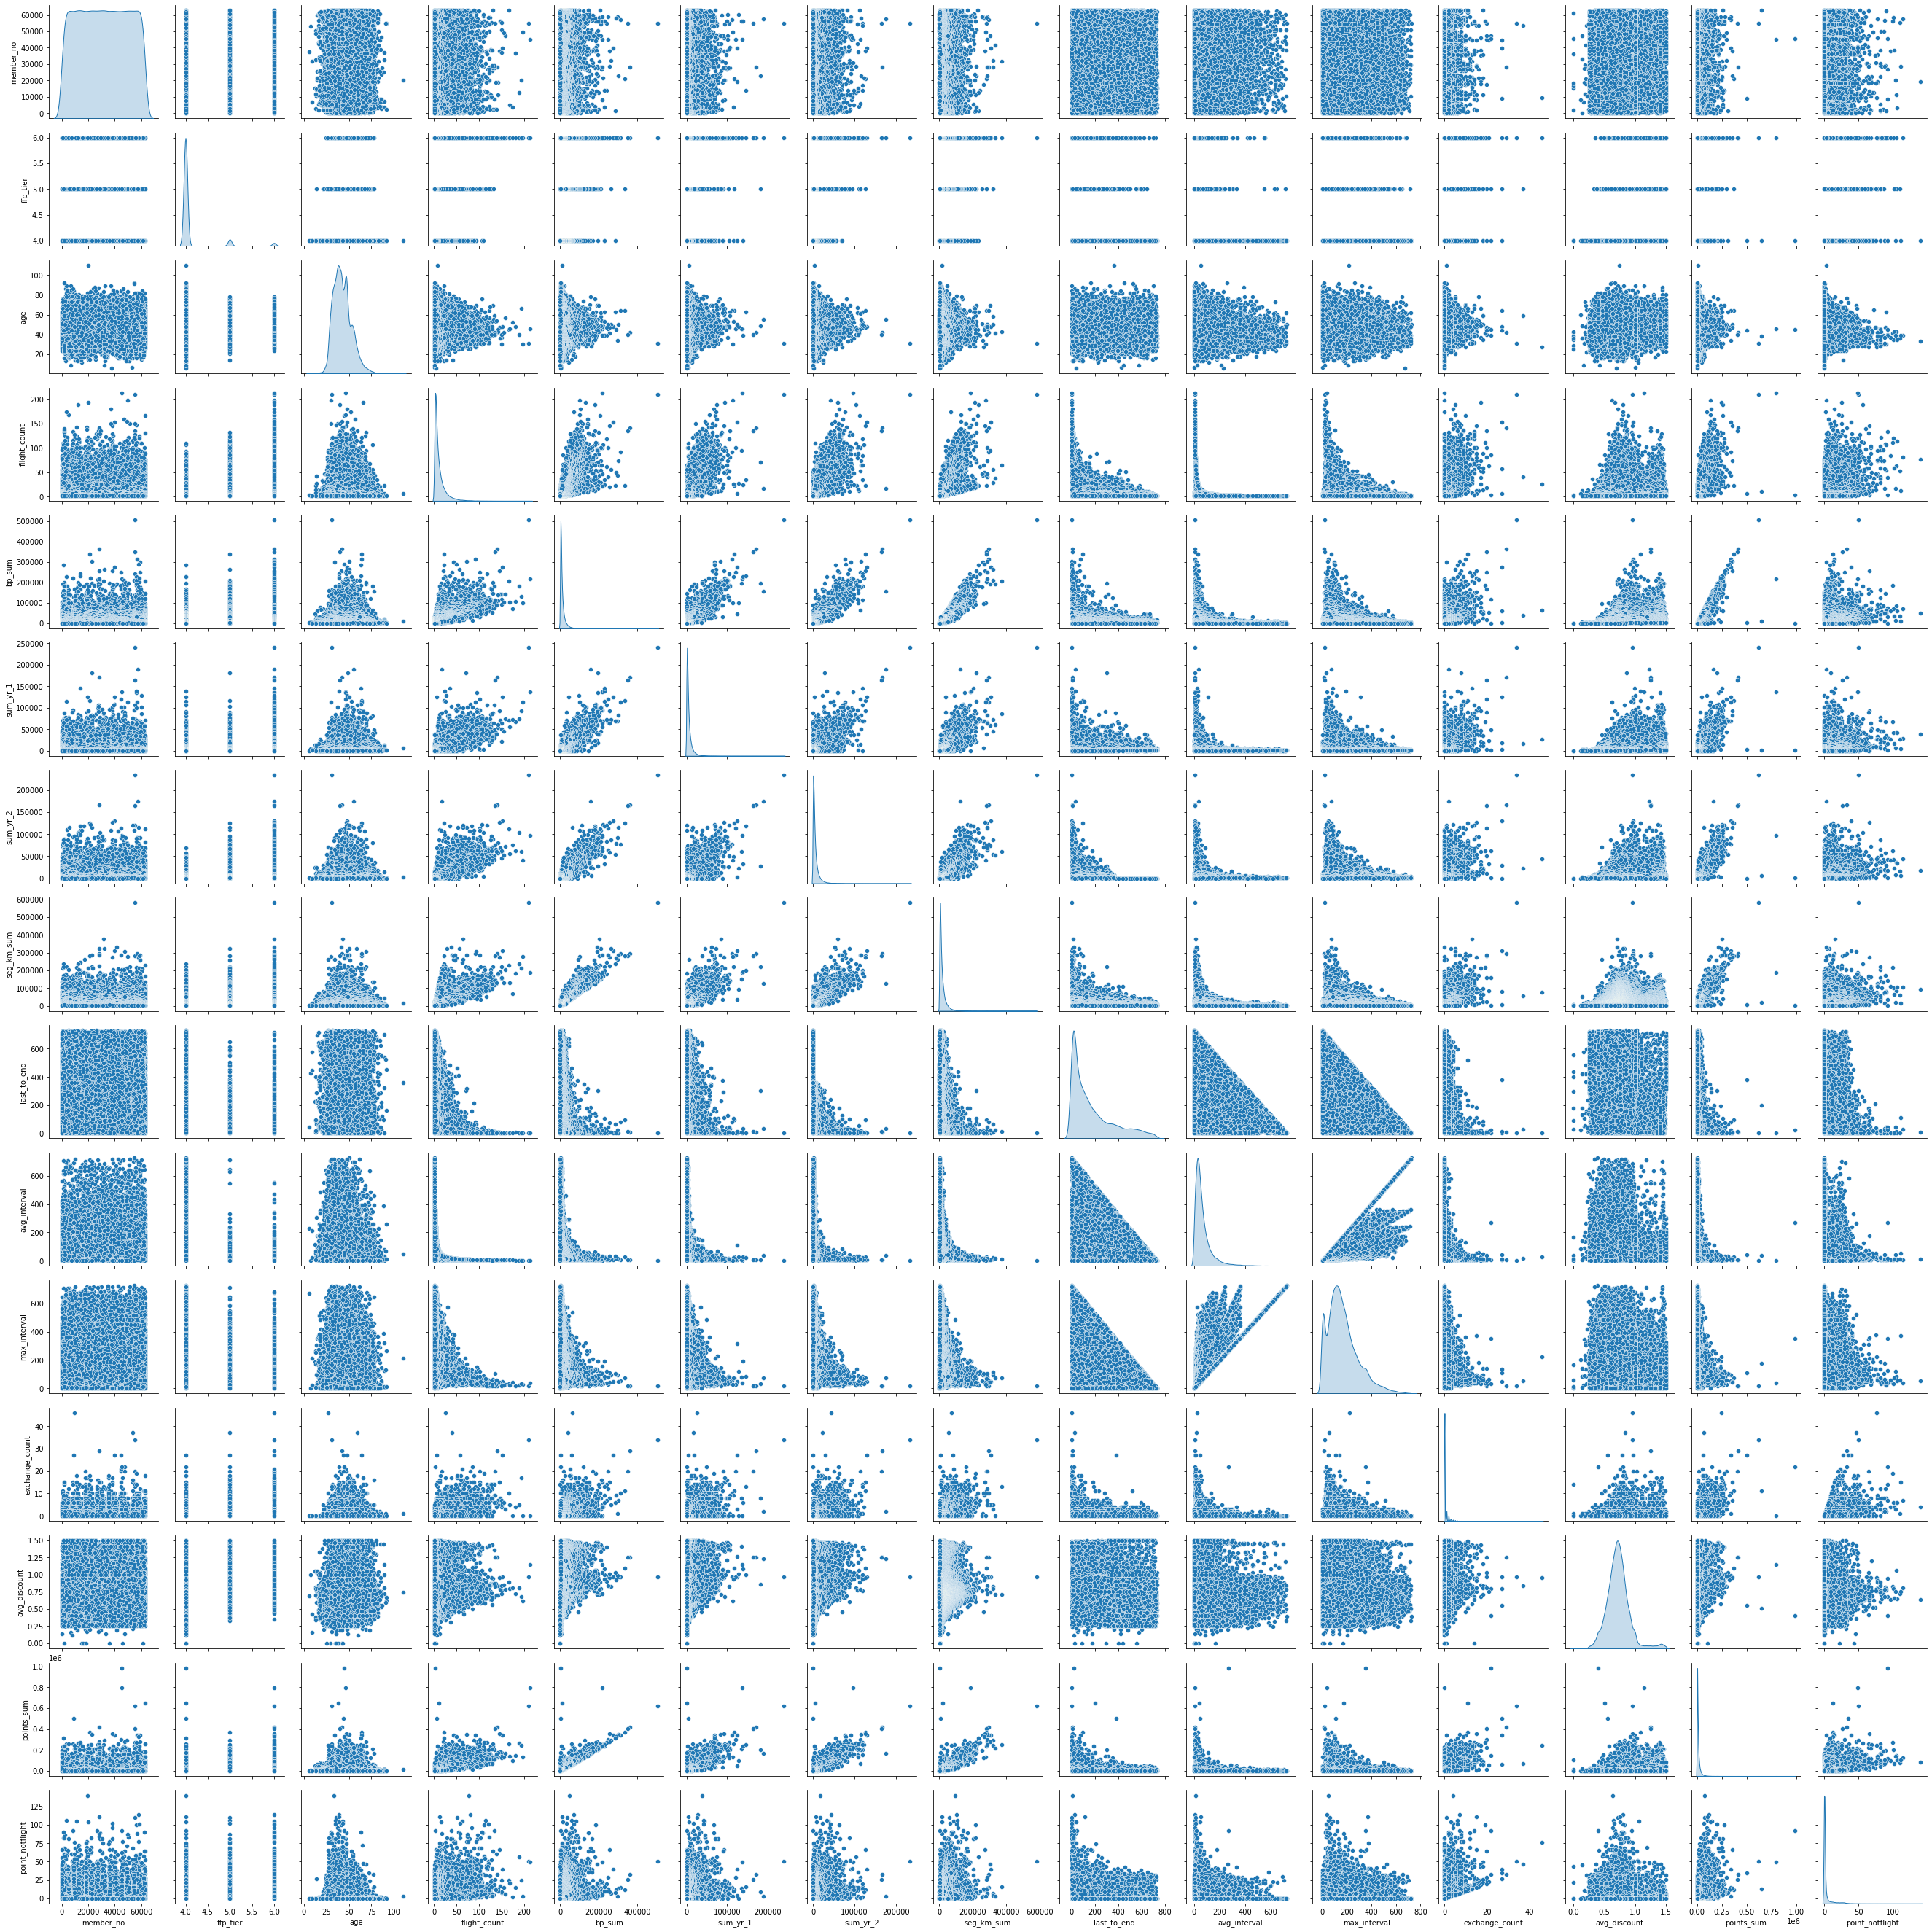

In [28]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_clean, diag_kind='kde')
plt.show()

Dalam Pair Plot banyak feature yang memiliki korelasi linear

## **EDA Conclusion**

Beberapa temuan dalam proses EDA yaitu:
- Hampir seluruh feature numerical memiliki outlier kecuali member_no & ffp_tier
- Hampir seluruh feature numerical memiliki distribusi positif skewed kecuali member_no & avg_discount
- Kebanyakan customer adalah Laki-laki
- Tampak kebanyakan feature catogorical memiliki nilai unique yang besar
- Untuk load_time hanya memiliki 1 value 2014-03-31 yang dimana merupakan tangal data diambil
- Banyak feature yang memiliki korelasi positif yang tinggi terhadap feature lainnya > 0.7

# **Data Pre-Processing Part 2**

## **Handle Outliers**

### **Age**

In [29]:
#Cek nilai outlier
Q1 = df_clean['age'].quantile(0.25)
Q2 = df_clean['age'].quantile(0.5)
Q3 = df_clean['age'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [30]:
low_limit,high_limit,Q1,Q2,Q3

(15.5, 67.5, 35.0, 41.0, 48.0)

In [31]:
df_clean.age.value_counts()

47     2689
38     2648
37     2629
42     2586
39     2553
       ... 
110       1
87        1
7         1
12        1
91        1
Name: age, Length: 84, dtype: int64

In [32]:
#Ubah nilai outlier menjadi batas atas dan batas bawah
df_clean.loc[(df_clean.age > high_limit,'age')] = high_limit
df_clean.loc[(df_clean.age < low_limit,'age')] = low_limit

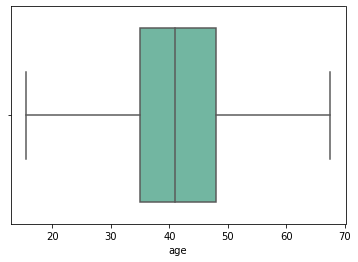

In [33]:
sns.boxplot(x = df_clean.age,palette="Set2")

### **Flight Count**

In [34]:
#Cek nilai outlier
Q1 = df_clean['flight_count'].quantile(0.25)
Q2 = df_clean['flight_count'].quantile(0.5)
Q3 = df_clean['flight_count'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [35]:
low_limit,high_limit,Q1,Q2,Q3

(-15.0, 33.0, 3.0, 7.0, 15.0)

In [36]:
df_clean.flight_count.value_counts()

2      9749
3      6316
4      5378
5      4255
6      3619
       ... 
154       1
189       1
117       1
137       1
210       1
Name: flight_count, Length: 153, dtype: int64

In [37]:
#Ubah nilai outlier menjadi batas atas
df_clean.loc[(df_clean.flight_count > high_limit,'flight_count')] = high_limit

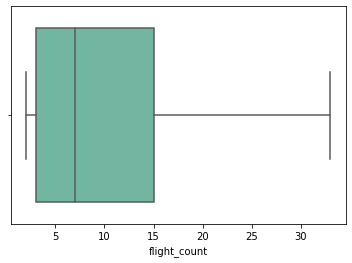

In [38]:
sns.boxplot(x = df_clean.flight_count,palette="Set2")

### **BP SUM (Rencana Perjalanan)**

In [39]:
#Cek nilai outlier
Q1 = df_clean['bp_sum'].quantile(0.25)
Q2 = df_clean['bp_sum'].quantile(0.5)
Q3 = df_clean['bp_sum'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [40]:
low_limit,high_limit,Q1,Q2,Q3

(-12953.0, 28479.0, 2584.0, 5780.0, 12942.0)

In [41]:
df_clean.bp_sum.value_counts()

0        521
1000     217
1526     120
700      108
2671     104
        ... 
20556      1
13381      1
19005      1
15591      1
503        1
Name: bp_sum, Length: 23274, dtype: int64

In [42]:
#Ubah nilai outlier menjadi batas atas
df_clean.loc[(df_clean.bp_sum > high_limit,'bp_sum')] = high_limit

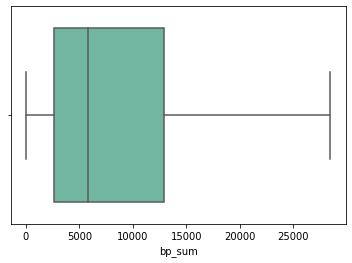

In [43]:
sns.boxplot(x = df_clean.bp_sum,palette="Set2")

### **SUM_YR_1 (Fare Revenue)**

In [44]:
#Cek nilai outlier
Q1 = df_clean['sum_yr_1'].quantile(0.25)
Q2 = df_clean['sum_yr_1'].quantile(0.5)
Q3 = df_clean['sum_yr_1'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [45]:
low_limit,high_limit,Q1,Q2,Q3

(-7335.0, 14945.0, 1020.0, 2811.0, 6590.0)

In [46]:
df_clean.sum_yr_1.value_counts()

0.0        9582
960.0       169
690.0       151
700.0       142
1024.0      136
           ... 
26651.0       1
18394.0       1
18185.0       1
21460.0       1
889.0         1
Name: sum_yr_1, Length: 15722, dtype: int64

In [47]:
#Ubah nilai outlier menjadi batas atas
df_clean.loc[(df_clean.sum_yr_1 > high_limit,'sum_yr_1')] = high_limit

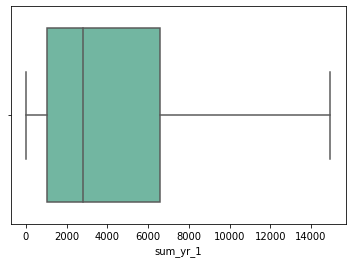

In [48]:
sns.boxplot(x = df_clean.sum_yr_1,palette="Set2")

### **SUM_YR_2 (Votes Price)**

In [49]:
#Cek nilai outlier
Q1 = df_clean['sum_yr_2'].quantile(0.25)
Q2 = df_clean['sum_yr_2'].quantile(0.5)
Q3 = df_clean['sum_yr_2'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [50]:
low_limit,high_limit,Q1,Q2,Q3

(-8285.0, 15995.0, 820.0, 2808.0, 6890.0)

In [51]:
df_clean.sum_yr_2.value_counts()

0.0         11171
883.0          75
644.0          65
986.0          62
1000.0         60
            ...  
20514.0         1
23373.0         1
17233.0         1
12202.0         1
234188.0        1
Name: sum_yr_2, Length: 16640, dtype: int64

In [52]:
#Ubah nilai outlier menjadi batas atas
df_clean.loc[(df_clean.sum_yr_2 > high_limit,'sum_yr_2')] = high_limit

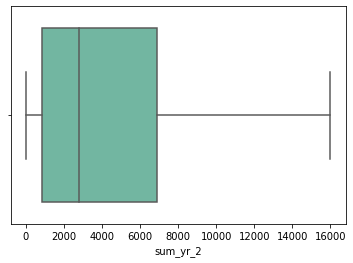

In [53]:
sns.boxplot(x = df_clean.sum_yr_2,palette="Set2")

###**SEG_KM_SUM (Total jarak yg sudah dilakukan)**

In [54]:
#Cek nilai outlier
Q1 = df_clean['seg_km_sum'].quantile(0.25)
Q2 = df_clean['seg_km_sum'].quantile(0.5)
Q3 = df_clean['seg_km_sum'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [55]:
low_limit,high_limit,Q1,Q2,Q3

(-20024.0, 46304.0, 4849.0, 10149.0, 21431.0)

In [56]:
df_clean.seg_km_sum.value_counts()

3934     295
2616     178
4154     176
1298     140
1158     114
        ... 
29313      1
38833      1
27634      1
30884      1
1062       1
Name: seg_km_sum, Length: 28814, dtype: int64

In [57]:
#Ubah nilai outlier menjadi batas atas
df_clean.loc[(df_clean.seg_km_sum > high_limit,'seg_km_sum')] = high_limit

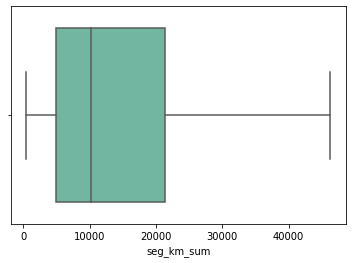

In [58]:
sns.boxplot(x = df_clean.seg_km_sum,palette="Set2")

###**Last To End (Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir)**

In [59]:
#Cek nilai outlier
Q1 = df_clean['last_to_end'].quantile(0.25)
Q2 = df_clean['last_to_end'].quantile(0.5)
Q3 = df_clean['last_to_end'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [60]:
low_limit,high_limit,Q1,Q2,Q3

(-323.0, 613.0, 28.0, 107.0, 262.0)

In [61]:
df_clean.last_to_end.value_counts()

1      956
2      929
4      917
3      775
5      763
      ... 
718      5
726      3
728      3
730      2
731      1
Name: last_to_end, Length: 730, dtype: int64

In [62]:
#Ubah outlier menjadi high limit
df_clean.loc[(df_clean.last_to_end > high_limit,'last_to_end')] = high_limit

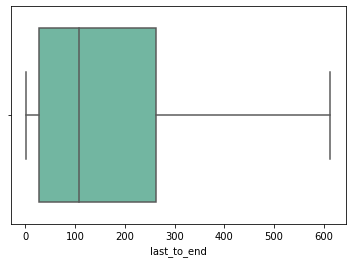

In [63]:
sns.boxplot(x = df_clean.last_to_end,palette="Set2")

###**Avg Interval (Rata - Rata Jarak Waktu)**

In [64]:
#Cek nilai outlier
Q1 = df_clean['avg_interval'].quantile(0.25)
Q2 = df_clean['avg_interval'].quantile(0.5)
Q3 = df_clean['avg_interval'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [65]:
low_limit,high_limit,Q1,Q2,Q3

(-64.46428572500001, 170.678571435, 23.71428571, 45.0, 82.5)

In [66]:
df_clean.avg_interval.value_counts()

2.000000      787
3.000000      722
4.000000      571
1.000000      537
5.000000      399
             ... 
20.130435       1
15.918919       1
17.162162       1
28.687500       1
411.000000      1
Name: avg_interval, Length: 10659, dtype: int64

In [67]:
#Ubah outlier menjadi batas atas
df_clean.loc[(df_clean.avg_interval > high_limit,'avg_interval')] = high_limit

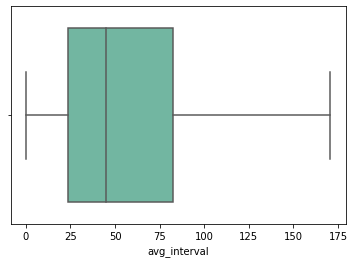

In [68]:
sns.boxplot(x = df_clean.avg_interval,palette="Set2")

###**Max Interval (Maksimal Jarak Waktu)**

In [69]:
#Cek nilai outlier
Q1 = df_clean['max_interval'].quantile(0.25)
Q2 = df_clean['max_interval'].quantile(0.5)
Q3 = df_clean['max_interval'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [70]:
low_limit,high_limit,Q1,Q2,Q3

(-141.0, 451.0, 81.0, 144.0, 229.0)

In [71]:
df_clean.max_interval.value_counts()

2      796
3      770
4      630
1      505
5      429
      ... 
712      1
690      1
714      1
672      1
659      1
Name: max_interval, Length: 706, dtype: int64

In [72]:
#Ubah outlier menjadi batas atas
df_clean.loc[(df_clean.max_interval > high_limit,'max_interval')] = high_limit

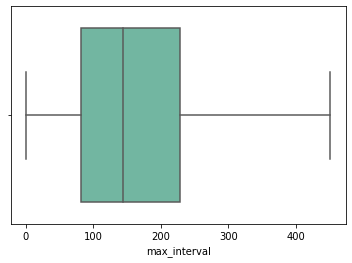

In [73]:
sns.boxplot(x = df_clean.max_interval,palette="Set2")

###**Exchange Count (Jumlah Penukaran)**

In [74]:
#Cek nilai outlier
Q1 = df_clean['exchange_count'].quantile(0.25)
Q2 = df_clean['exchange_count'].quantile(0.5)
Q3 = df_clean['exchange_count'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [75]:
low_limit,high_limit,Q1,Q2,Q3

(0.0, 0.0, 0.0, 0.0, 0.0)

In [76]:
df_clean.exchange_count.value_counts()

0     52837
1      3902
2      2231
3      1051
4       586
5       307
6       184
7       105
8        71
9        38
10       35
11       18
12       14
14       11
13       11
15        9
17        5
20        4
18        4
16        3
27        3
22        2
21        1
46        1
34        1
19        1
29        1
37        1
Name: exchange_count, dtype: int64

Karena nilai batas atas dan bawah hanya berada di 1 data maka outlier tidak dihilangkan

###**Avg Discount**

In [77]:
#Cek nilai outlier
Q1 = df_clean['avg_discount'].quantile(0.25)
Q2 = df_clean['avg_discount'].quantile(0.5)
Q3 = df_clean['avg_discount'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [78]:
low_limit,high_limit,Q1,Q2,Q3

(0.31777011950000006, 1.1037164675, 0.6125, 0.71178093, 0.808986587)

In [79]:
df_clean.avg_discount.value_counts()

1.000000    683
0.400000    377
0.800000    359
0.750000    353
0.700000    288
           ... 
0.883060      1
0.895272      1
0.698401      1
0.771263      1
0.576928      1
Name: avg_discount, Length: 53234, dtype: int64

In [80]:
#Ubah outlier menjadi batas atas dan bawah
df_clean.loc[(df_clean.avg_discount > high_limit,'avg_discount')] = high_limit
df_clean.loc[(df_clean.avg_discount < low_limit,'avg_discount')] = low_limit

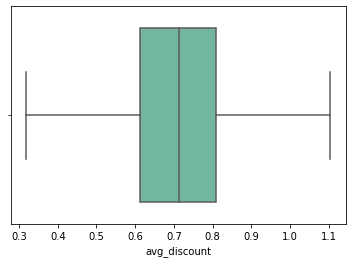

In [81]:
sns.boxplot(x = df_clean.avg_discount,palette="Set2")

###**Point Sum (Jumlah Point Yang Didapat Customer)**

In [82]:
#Cek nilai outlier
Q1 = df_clean['points_sum'].quantile(0.25)
Q2 = df_clean['points_sum'].quantile(0.5)
Q3 = df_clean['points_sum'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [83]:
low_limit,high_limit,Q1,Q2,Q3

(-14542.5, 31805.5, 2838.0, 6420.0, 14425.0)

In [84]:
df_clean.points_sum.value_counts()

0         386
1000      187
1526       88
700        87
400        74
         ... 
23947       1
23158       1
18690       1
24291       1
106972      1
Name: points_sum, Length: 24871, dtype: int64

In [85]:
#Ubah outlier menjadi batas atas
df_clean.loc[(df_clean.points_sum > high_limit,'points_sum')] = high_limit

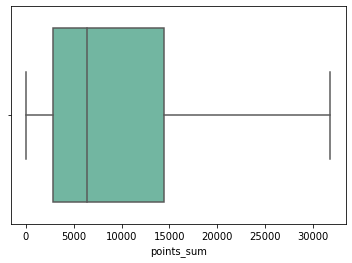

In [86]:
sns.boxplot(x = df_clean.points_sum,palette="Set2")

###**Point Not Flight (Jumlah Point Yang Tidak Digunakan Customer)**

In [87]:
#Cek nilai outlier
Q1 = df_clean['point_notflight'].quantile(0.25)
Q2 = df_clean['point_notflight'].quantile(0.5)
Q3 = df_clean['point_notflight'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [88]:
low_limit,high_limit,Q1,Q2,Q3

(-1.5, 2.5, 0.0, 0.0, 1.0)

In [89]:
df_clean.point_notflight.value_counts()

0      41263
1       6266
2       2792
3       1620
4       1079
       ...  
76         1
83         1
86         1
101        1
111        1
Name: point_notflight, Length: 98, dtype: int64

In [90]:
#Ubah value diatas menjadi 10 (Asumsi Point maksimal yang tidak digunakan adalah 10)
df_clean.loc[(df_clean.point_notflight > 10,'point_notflight')] = 10

In [91]:
df_clean.point_notflight.value_counts()

0     41263
1      6266
10     5899
2      2792
3      1620
4      1079
5       712
6       573
7       452
8       395
9       386
Name: point_notflight, dtype: int64

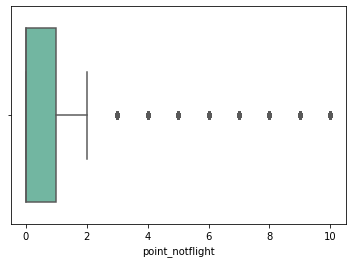

In [92]:
sns.boxplot(x = df_clean.point_notflight,palette="Set2")

###**Summary Handling Outlier**

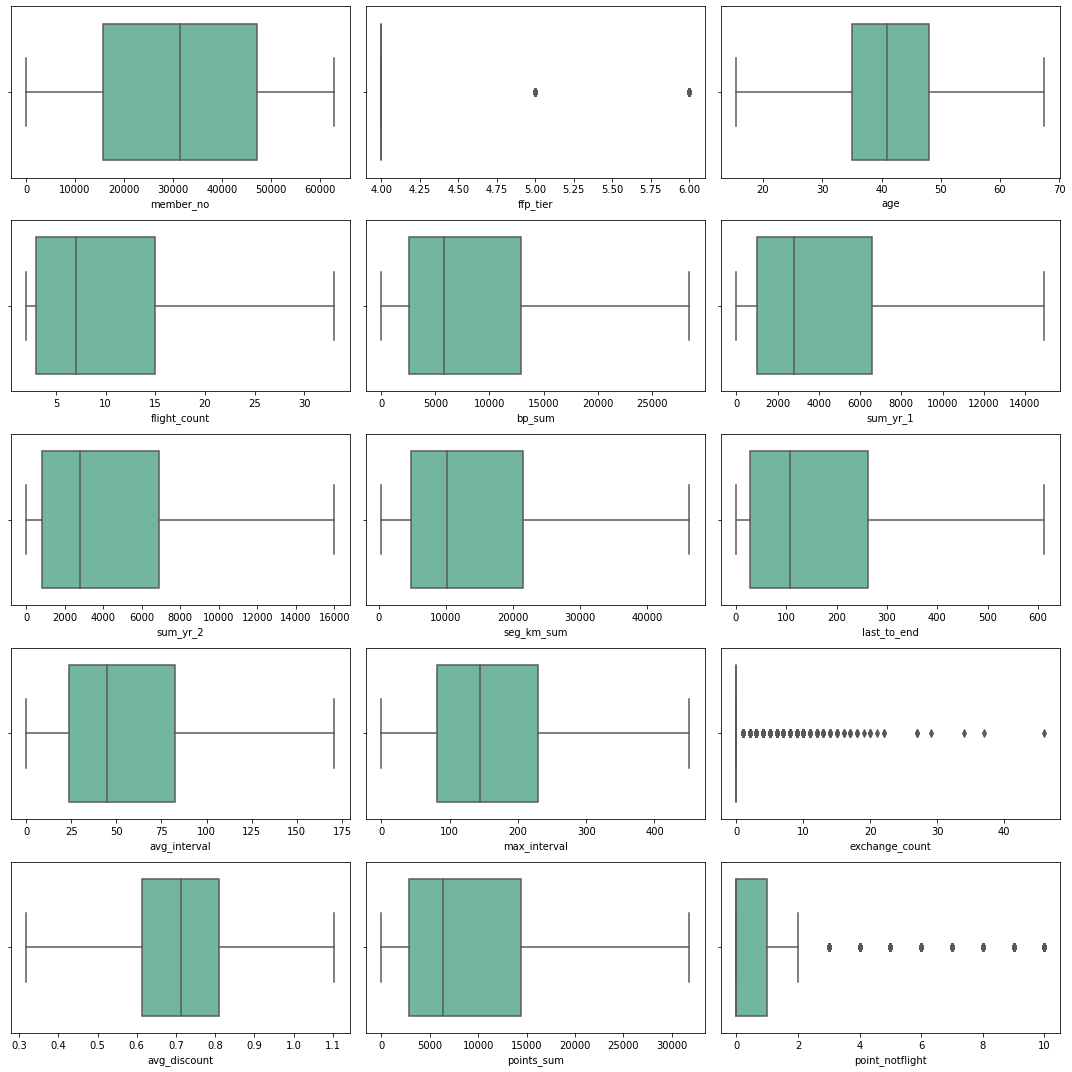

In [93]:
# boxplot visualization after handling outlier

plt.figure(figsize=(15, 15))
for i in range(0, len(numerical)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df_clean[numerical[i]], palette="Set2")
    plt.tight_layout()

plt.show()

1) Hampir semua fiture yang memiliki outlier dihandling dengan cara diubah menjadi nilai batas atas kecuali fitur `exchange_count` dan `point_not_flight`

2) Untuk Feature `exchange_count` karena data hanya terpusat pada satu value (High limit dan limit sama) maka outlier tidak dihilangkan untuk memberikan variasi data

3) Untuk feature `point_not_flight` outlier tidak sepenuhnya dihilangkan akan tetapi diberikan batas maksimal

# **Feature Engineering**

In [94]:
# tambah feature ffp_time untuk mengetahui berapa bulan customer join program saat data diambil 
df_clean['ffp_time'] = (df_clean['load_time'] - df_clean['ffp_date'])/np.timedelta64(1,'M')

# **Feature Selection**

In [95]:
#remove column unrelated to RFM
df_clean.drop(['ffp_time', 'sum_yr_2','seg_km_sum', 'avg_discount','gender', 'work_city', 'work_province', 'work_country','last_flight_date', 'first_flight_date','avg_interval', 'max_interval','member_no', 'ffp_tier', 'age', 'bp_sum', 'exchange_count','points_sum','point_notflight'], axis = 1, inplace=True)

In [96]:
#remove redundant column
df_clean.drop(['load_time', 'ffp_date'], axis = 1, inplace=True)

# **Normalization/Standardization**

In [97]:
df_clean.skew()

flight_count    1.212919
sum_yr_1        1.121951
last_to_end     1.114797
dtype: float64

In [98]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [99]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(df_clean.astype(float))

In [100]:
df_clean.head()

flight_count  sum_yr_1  last_to_end
0            33   14945.0            1
1            33   14945.0            7
2            33   14945.0           11
3            23   14945.0           97
4            33   14945.0            5

# **Clustering (K-Means)**

In [101]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_std)

In [102]:
df_data_std = pd.DataFrame(data=data_std, columns=list(df_clean))

In [103]:
df_data_std['clusters'] = kmeans.labels_
df_clean['clusters'] = kmeans.labels_

In [104]:
display(df_clean.groupby('clusters').agg(['mean','median']))

flight_count             sum_yr_1          last_to_end       
                 mean median          mean   median        mean median
clusters                                                              
0            3.902763    3.0   3134.411888   2370.0  451.533080  442.0
1           25.085357   26.0  11365.027867  11911.0   57.663619   25.0
2            7.541858    6.0   2238.026832   1654.0   99.853408   84.0

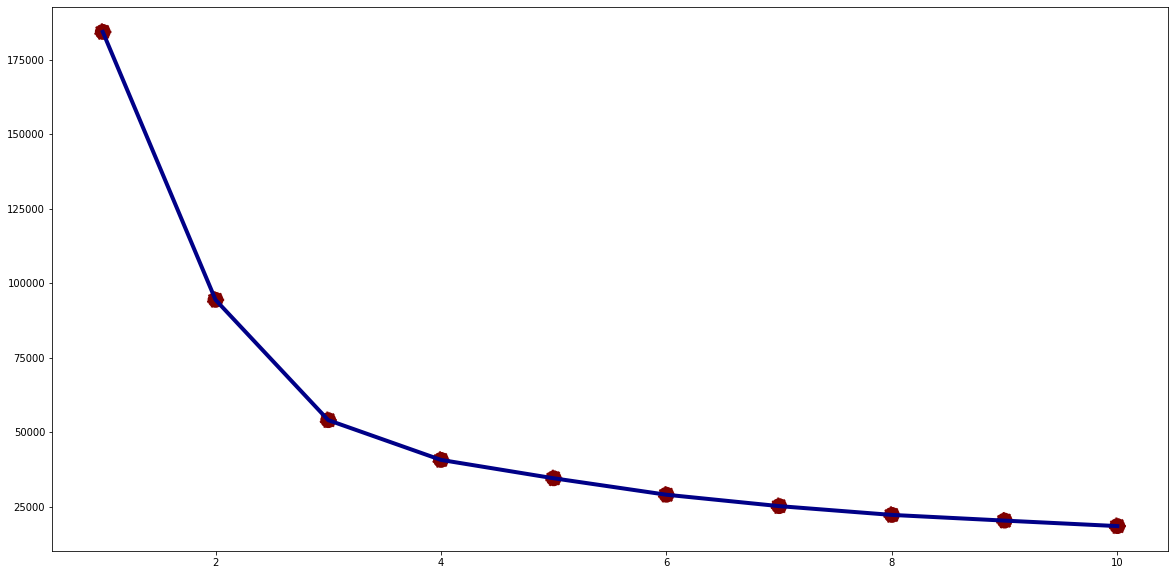

In [105]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [106]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


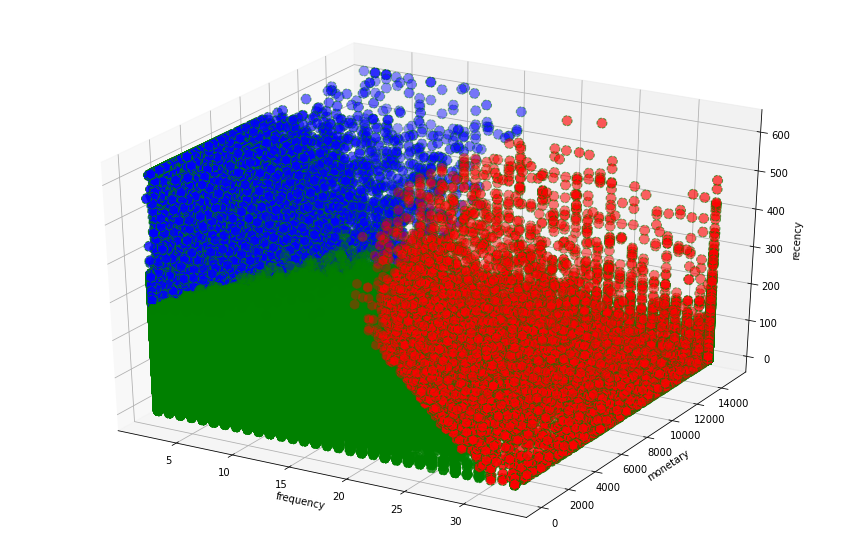

In [107]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from scipy.cluster.hierarchy import linkage,dendrogram

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_clean.flight_count[df_clean.clusters == 0], df_clean["sum_yr_1"][df_clean.clusters == 0], df_clean["last_to_end"][df_clean.clusters == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(df_clean.flight_count[df_clean.clusters == 1], df_clean["sum_yr_1"][df_clean.clusters == 1], df_clean["last_to_end"][df_clean.clusters == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(df_clean.flight_count[df_clean.clusters == 2], df_clean["sum_yr_1"][df_clean.clusters == 2], df_clean["last_to_end"][df_clean.clusters == 2], c='green', s=100, edgecolor='green',linestyle='--')


plt.xlabel("frequency")
plt.ylabel("monetary")
ax.set_zlabel('recency')
plt.show()

In [108]:
from sklearn.metrics import silhouette_score
arr_silhouette_score_mahalanobis = []
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(data_std)
    preds = kmeans.predict(data_std)
    
    score_mahalanobis = silhouette_score(data_std, preds, metric='mahalanobis')
    arr_silhouette_score_mahalanobis.append(score_mahalanobis)
    
    score_euclidean = silhouette_score(data_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

In [109]:
print(arr_silhouette_score_mahalanobis)
print(arr_silhouette_score_euclidean)

[0.3524073311160465, 0.3886840990832912, 0.32432603957210365, 0.2552578136151407, 0.2890890748814718, 0.27922892082543116, 0.28564129820568845, 0.2953032925290381, 0.26933193860157306]
[0.482015139104319, 0.4691954861890652, 0.4261226323852441, 0.3693794360620334, 0.37719701016824064, 0.3720886848842235, 0.3797569006955738, 0.36783044725216524, 0.3474156590262836]


##**Modeling**
Modeling dilakukan dengan clustering menggunakan k-means dimana berdasarkan elbow method digunakan jumlah cluster yaitu sebanyak 3 cluster.

##**Feature**
Feature yang mempengaruhi dalam segmentasi pelanggan bedasarkan Recency, Frequency, Monetary (RFM) yaitu jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir, banyaknya penerbangan yang dilakukan konsumen, dan penghasilan dari pembelian tiket pesawat.

##**Cluster Explanation**
Adapun penjelasan terhadap ke-3 cluster yang terbentuk adalah:

Cluster 0 merupakan pelanggan yang memiliki frekuensi terbang rendah (rata-rata 4x penerbangan), memberikan rata - rata revenue sedang (rata- rata 3134), dan memiliki selisih waktu paling lama sejak waktu penerbangan terakhir mereka terhitung saat data ini diambil (rata-rata 452 hari)

Cluster 1 merupakan pelanggan yang memiliki frekuensi terbang tinggi (rata-rata 25x penerbangan), memberikan rata - rata revenue tinggi (rata- rata 11365), dan memiliki selisih waktu paling sebentar sejak waktu penerbangan terakhir mereka terhitung saat data ini diambil (rata-rata 58 hari)

Cluster 2 merupakan pelanggan yang memiliki frekuensi terbang sedang (rata-rata 8x penerbangan), memberikan rata - rata revenue rendah (rata- rata 2238), dan memiliki selisih cukup lama sejak waktu penerbangan terakhir mereka terhitung saat data ini diambil (rata-rata 100 hari).

##**Business Recommendation**

1. Fokus untuk menggencarkan strategi marketing  kepada pelanggan yang tergolong cluster 1, untuk meningkatkan jumlah penerbangan mereka yang masih rendah dan sudah lama tidak melakukan penerbangan. Strategi marketing dapat dilakukan dengan memberikan promo discount atau partnership dengan travel agent untuk memberikan promo paket liburan menarik di luar kota, agar konsumen tersebut tertarik untuk terbang kembali menggunakan maskapai ini.

2. Fokus untuk mempertahankan pelanggan yang tergolong cluster 2 dengan menawarkan pembuatan membership premium maskapai.

In [110]:
#pca = PCA(n_components=2)

#pca.fit(data_std)
#pcs = pca.transform(data_std)

#data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
#data_pca['clusters'] = df_clean['clusters']
#data_pca.head()

In [111]:
#fig, ax = plt.subplots(figsize=(15,10))

#sns.scatterplot(
   #x="PC 1", y="PC 2",
    #hue="clusters",
    #edgecolor='green',
    #linestyle='--',
    #data=data_pca,
   #palette=['blue','red','green'],
    #s=160,
    #ax=ax
#)